# CNN_Feature_Maps

In [24]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist

(X_train, y_train),(X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255, X_test / 255

X_train = X_train.reshape((60000, 28, 28, 1))
X_test = X_test.reshape((10000, 28, 28, 1))

In [25]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Conv2D(3, kernel_size=(3,3), strides=(1,1), padding="same", activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")              
])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 3)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 14, 14, 3)         0         
                                                                 
 flatten_2 (Flatten)         (None, 588)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)              589000    
                                                                 
 dense_5 (Dense)             (None, 10)                10010     
                                                      

In [26]:
# layer에 인덱싱을 통해서 원하는 layer의 정보를 조회
# 해당 실습에서는 conv를 알아보자
model.layers

아직 학습하지 않은 Conv 레이어의 weigths

In [27]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()
conv_weights.mean(), conv_weights.std()

(0.012864082, 0.23187771)

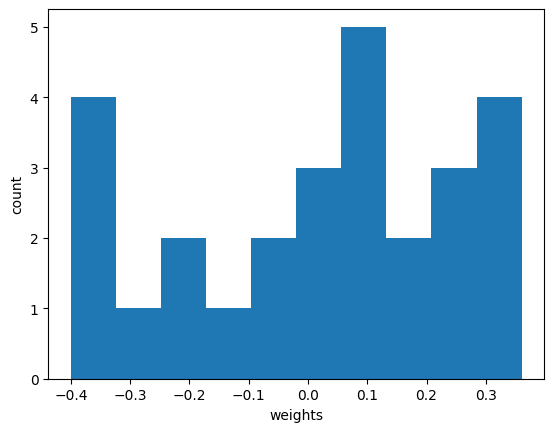

In [28]:
import matplotlib.pyplot as plt

plt.hist(conv_weights.reshape(-1, 1))
plt.xlabel("weights")
plt.ylabel("count")
plt.show()

#### 학습 전 conv filter

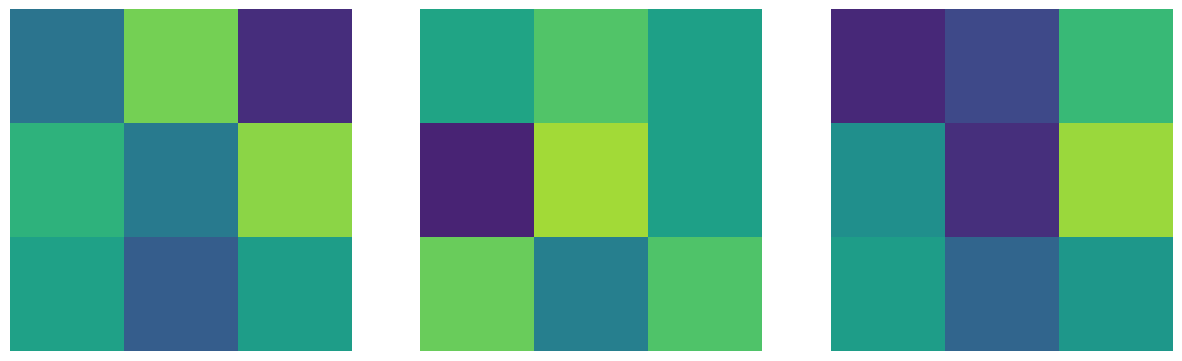

In [29]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(conv_weights[:,:,0,i], vmin=-0.5, vmax=0.5)
    ax[i].axis("off")
    
plt.show()

In [30]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = model.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2559 - accuracy: 0.9204 - val_loss: 0.1045 - val_accuracy: 0.9653
Epoch 2/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.1266 - accuracy: 0.9597 - val_loss: 0.0758 - val_accuracy: 0.9760
Epoch 3/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0953 - accuracy: 0.9690 - val_loss: 0.0644 - val_accuracy: 0.9781
Epoch 4/5
1875/1875 [==============================] - 25s 13ms/step - loss: 0.0794 - accuracy: 0.9744 - val_loss: 0.0579 - val_accuracy: 0.9804
Epoch 5/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.0670 - accuracy: 0.9784 - val_loss: 0.0591 - val_accuracy: 0.9803


#### 학습 후 conv filter

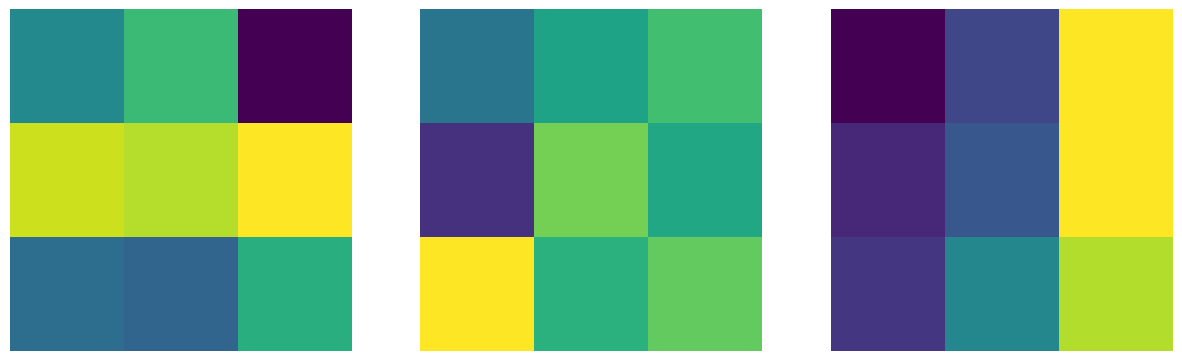

In [31]:
conv = model.layers[0]
conv_weights = conv.weights[0].numpy()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))
for i in range(3):
    ax[i].imshow(conv_weights[:,:,0,i], vmin=-0.5, vmax=0.5)
    ax[i].axis("off")
    
plt.show()

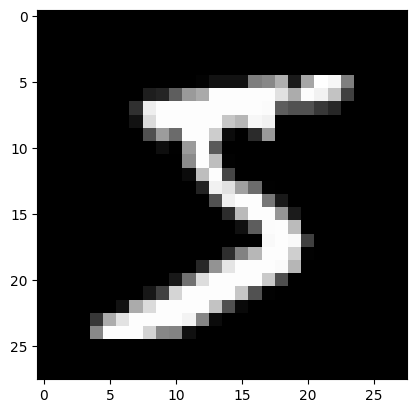

In [32]:
plt.imshow(X_train[0], cmap="gray")

In [33]:
inputs = X_train[0].reshape(-1, 28, 28, 1)
conv_layer_output = tf.keras.Model(model.input, model.layers[0].output)
conv_layer_output.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2_input (InputLayer)  [(None, 28, 28, 1)]      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 3)         30        
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [34]:
feature_maps = conv_layer_output.predict(inputs)
feature_maps.shape

1/1 [==============================] - 0s 60ms/step


(1, 28, 28, 3)

#### feature_maps

In [35]:
def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1,4, figsize=(15,5))
    ax[0].imshow(feature_maps[0,:,:,0], cmap="gray")
    
    for i in range(1, 4):
        ax[i].imshow(feature_maps[0,:,:,i-1])
        ax[i].axis("Off")
    plt.show()

1/1 [==============================] - 0s 26ms/step


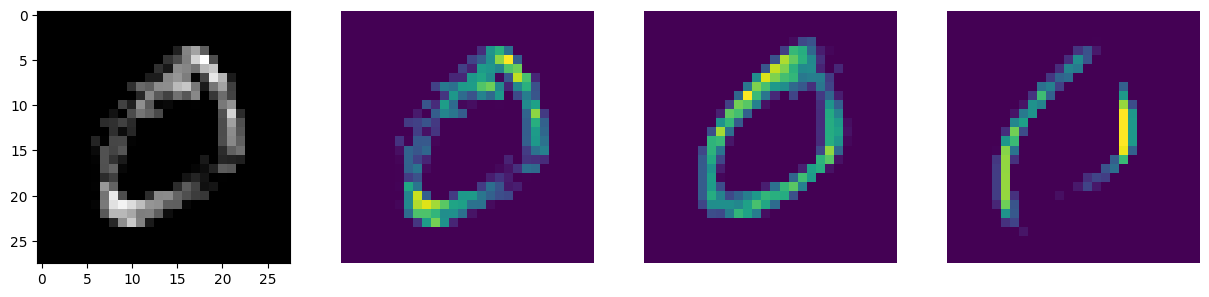

In [36]:
draw_feature_maps(1)

1/1 [==============================] - 0s 36ms/step


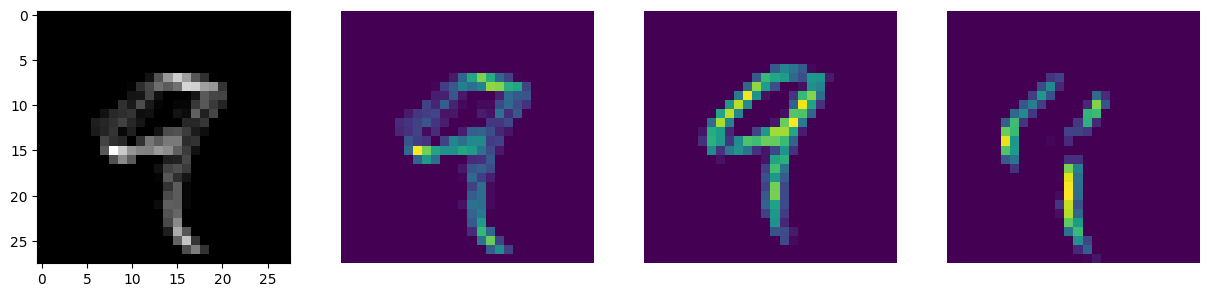

In [37]:
draw_feature_maps(4)

## 채널 증가

In [38]:
from tensorflow.keras import layers, models

model1 = models.Sequential([
    layers.Conv2D(8, kernel_size=(3, 3), strides=(1,1), padding="same", activation="relu", input_shape=(28,28,1)),
    layers.MaxPooling2D(pool_size=(2,2), strides=(2,2)),
    layers.Dropout(0.25),
    layers.Flatten(),
    layers.Dense(1000, activation="relu"),
    layers.Dense(10, activation="softmax")              
])

model1.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 8)        0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 14, 14, 8)         0         
                                                                 
 flatten_3 (Flatten)         (None, 1568)              0         
                                                                 
 dense_6 (Dense)             (None, 1000)              1569000   
                                                                 
 dense_7 (Dense)             (None, 10)                10010     
                                                      

In [39]:
model1.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
hist = model1.fit(X_train, y_train, epochs=5, verbose=1, validation_data = (X_test, y_test))

Epoch 1/5
1875/1875 [==============================] - 46s 24ms/step - loss: 0.1633 - accuracy: 0.9499 - val_loss: 0.0579 - val_accuracy: 0.9810
Epoch 2/5
1875/1875 [==============================] - 45s 24ms/step - loss: 0.0680 - accuracy: 0.9784 - val_loss: 0.0442 - val_accuracy: 0.9856
Epoch 3/5
1875/1875 [==============================] - 47s 25ms/step - loss: 0.0460 - accuracy: 0.9854 - val_loss: 0.0403 - val_accuracy: 0.9876
Epoch 4/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0350 - accuracy: 0.9884 - val_loss: 0.0353 - val_accuracy: 0.9881
Epoch 5/5
1875/1875 [==============================] - 52s 28ms/step - loss: 0.0270 - accuracy: 0.9909 - val_loss: 0.0422 - val_accuracy: 0.9870


#### feature_maps

In [40]:
conv_layer_output = tf.keras.Model(model1.input, model1.layers[0].output)

def draw_feature_maps(n):
    inputs = X_train[n].reshape(-1, 28, 28, 1)
    feature_maps = conv_layer_output.predict(inputs)
    
    fig, ax = plt.subplots(1,9, figsize=(15,5))
    ax[0].imshow(feature_maps[0,:,:,0], cmap="gray")
    
    for i in range(1, 9):
        ax[i].imshow(feature_maps[0,:,:,i-1])
        ax[i].axis("Off")
    plt.show()

1/1 [==============================] - 0s 51ms/step


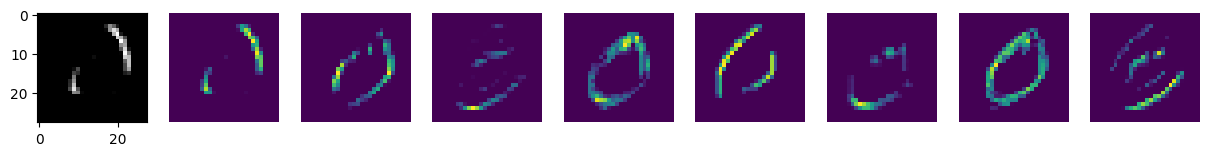

In [41]:
draw_feature_maps(1)

1/1 [==============================] - 0s 24ms/step


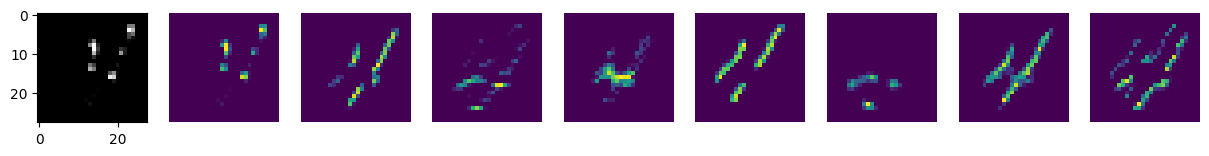

In [42]:
draw_feature_maps(9)